In [194]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [195]:
data = pd.read_excel('FEV-data-Excel.xlsx')

In [196]:
data.columns = [c.strip() for c in data.columns]

In [197]:
data.head(5)

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [198]:
data.isnull().sum()

,0
Car full name,0
Make,0
Model,0
Minimal price (gross) [PLN],0
Engine power [KM],0
Maximum torque [Nm],0
Type of brakes,1
Drive type,0
Battery capacity [kWh],0
Range (WLTP) [km],0


In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Car full name                           53 non-null     object 
 1   Make                                    53 non-null     object 
 2   Model                                   53 non-null     object 
 3   Minimal price (gross) [PLN]             53 non-null     int64  
 4   Engine power [KM]                       53 non-null     int64  
 5   Maximum torque [Nm]                     53 non-null     int64  
 6   Type of brakes                          52 non-null     object 
 7   Drive type                              53 non-null     object 
 8   Battery capacity [kWh]                  53 non-null     float64
 9   Range (WLTP) [km]                       53 non-null     int64  
 10  Wheelbase [cm]                          53 non-null     float64


In [200]:
data.dropna(subset='Type of brakes', inplace=True)

In [201]:
num_cols = ['Permissable gross weight [kg]',
            'Maximum load capacity [kg]',
            'mean - Energy consumption [kWh/100 km]',
            'Acceleration 0-100 kph [s]',
            'Boot capacity (VDA) [l]']

In [202]:
for col in num_cols:
  data[col].fillna(data[col].median(), inplace=True)

##Data Cleaning: Handling Missing Values:-
####I replaced the missing values with the median of each column.
####The following columns were cleaned:-

```
1.   Permissible gross weight [kg]
2.   Maximum load capacity [kg]
3.   Mean - Energy consumption [kWh/100 km]
4.   Acceleration 0–100 kph [s]
5.   Boot capacity (VDA) [l]



```



In [203]:
data.rename(columns={
    'Car full name': 'Car_Name',
    'Minimal price (gross) [PLN]': 'Price_PLN',
    'Engine power [KM]': 'Power_KM',
    'Maximum torque [Nm]': 'Max_Torque_Nm',
    'Type of brakes': 'Types_of_Brakes',
    'Drive type': 'Drive_Type',
    'Battery capacity [kWh]': 'Battery_kWh',
    'Range (WLTP) [km]': 'Range_km',
    'Wheelbase [cm]': 'Wheelbase_cm',
    'Length [cm]': 'Length_cm',
    'Width [cm]': 'Width_cm',
    'Height [cm]': 'Height_cm',
    'Minimal empty weight [kg]': 'Weight_Empty_kg',
    'Permissable gross weight [kg]': 'Weight_Gross_kg',
    'Maximum load capacity [kg]': 'Load_Capacity_kg',
    'Number of seats': 'No_of_Seats',
    'Number of doors': 'No_of_Doors',
    'Tire size [in]': 'Tire_Size_in',
    'Maximum speed [kph]': 'Max_Speed_kph',
    'Boot capacity (VDA) [l]': 'Boot_Capacity_l',
    'Acceleration 0-100 kph [s]': 'Accel_0_100_s',
    'Maximum DC charging power [kW]': 'DC_Charge_kW',
    'mean - Energy consumption [kWh/100 km]': 'mean_Energy_Consumption_kWh_100km'
}, inplace=True)

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Car_Name                           52 non-null     object 
 1   Make                               52 non-null     object 
 2   Model                              52 non-null     object 
 3   Price_PLN                          52 non-null     int64  
 4   Power_KM                           52 non-null     int64  
 5   Max_Torque_Nm                      52 non-null     int64  
 6   Types_of_Brakes                    52 non-null     object 
 7   Drive_Type                         52 non-null     object 
 8   Battery_kWh                        52 non-null     float64
 9   Range_km                           52 non-null     int64  
 10  Wheelbase_cm                       52 non-null     float64
 11  Length_cm                          52 non-null     float64
 12  W

##Renamed_columns:-

```
1. Removes spaces & special characters (so you don’t get KeyError issues).
2. Makes column names short, readable, and Python-friendly.
```



In [205]:
data.head()

,Car_Name,Make,Model,Price_PLN,Power_KM,Max_Torque_Nm,Types_of_Brakes,Drive_Type,Battery_kWh,Range_km,...,Weight_Gross_kg,Load_Capacity_kg,No_of_Seats,No_of_Doors,Tire_Size_in,Max_Speed_kph,Boot_Capacity_l,Accel_0_100_s,DC_Charge_kW,mean_Energy_Consumption_kWh_100km
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


##Task: 1:- A customer has a budget of 350,000 PLN and wants an EV with a minimum range of 400 km

###(A). Your task is to filter out EVs that meet these criteria.

In [206]:
Budget = 350000
Min_range = 400


filtered = data[(data['Price_PLN'] <= Budget) & (data['Range_km'] >= Min_range)].reset_index()


In [207]:
print("Number of EVs matching criteria:", filtered.shape[0])

Number of EVs matching criteria: 12


In [208]:
filtered.loc[0:5, ['Car_Name', 'Price_PLN', 'Range_km']]

,Car_Name,Price_PLN,Range_km
0,Audi e-tron 55 quattro,345700,438
1,BMW iX3,282900,460
2,Hyundai Kona electric 64kWh,178400,449
3,Kia e-Niro 64kWh,167990,455
4,Kia e-Soul 64kWh,160990,452
5,Mercedes-Benz EQC,334700,414


###(B). Group them by the manufacturer(Make).

In [209]:
grouped = filtered.groupby('Make')
grouped.size().reset_index(name = 'Model_count')

,Make,Model_count
0,Audi,1
1,BMW,1
2,Hyundai,1
3,Kia,2
4,Mercedes-Benz,1
5,Tesla,3
6,Volkswagen,3


###(C). Calculate the Average battery capacity for each manufacturer.

In [210]:
avg_battery = grouped['Battery_kWh'].mean().reset_index(name = 'Avg_Battery_kWh').sort_values(by='Avg_Battery_kWh', ascending=False)
avg_battery

,Make,Avg_Battery_kWh
0,Audi,95.000000
1,BMW,80.000000
4,Mercedes-Benz,80.000000
6,Volkswagen,70.666667
5,Tesla,68.000000
2,Hyundai,64.000000
3,Kia,64.000000


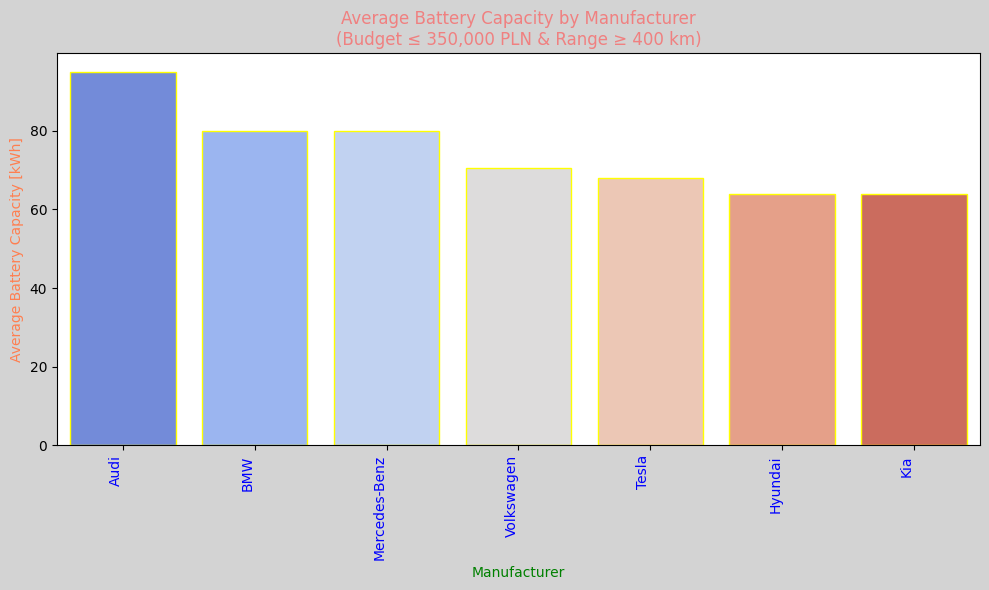

In [211]:
plt.figure(figsize=(10,6), facecolor = 'lightgrey')
sns.barplot(x='Make', y='Avg_Battery_kWh', data=avg_battery, palette='coolwarm', edgecolor='yellow', linewidth=1, ci=None)

plt.title("Average Battery Capacity by Manufacturer\n(Budget ≤ 350,000 PLN & Range ≥ 400 km)", color = 'lightcoral')
plt.xlabel("Manufacturer", color = 'green')
plt.ylabel("Average Battery Capacity [kWh]", color = 'coral')
plt.xticks(rotation=90, ha='right', color = 'BLUE')
plt.tight_layout()
plt.show()


##Insight:-



```
1.
```





##Task 2: - You suspect some EVs have unusually high or low energy consumption.

In [212]:
#Find the outliers in the mean- Energy Consumption [kWh/100] column.
Quartile_1 = data['mean_Energy_Consumption_kWh_100km'].quantile(0.25)
Quartile_3 = data['mean_Energy_Consumption_kWh_100km'].quantile(0.75)

IQR = Quartile_3 - Quartile_1

Lower_bound = Quartile_1 - 1.5 * IQR
Upper_bound = Quartile_3 + 1.5 * IQR

Outliers = data[(data['mean_Energy_Consumption_kWh_100km'] < Lower_bound) | (data['mean_Energy_Consumption_kWh_100km'] > Upper_bound)]

In [213]:
print("Lower Bound:", Lower_bound)
print("Upper Bound:", Upper_bound)
print("Number of Outliers:", Outliers.shape[0])
Outliers[['Car_Name','Make','mean_Energy_Consumption_kWh_100km']]


Lower Bound: 7.581249999999999
Upper Bound: 29.63125
Number of Outliers: 0


,Car_Name,Make,mean_Energy_Consumption_kWh_100km


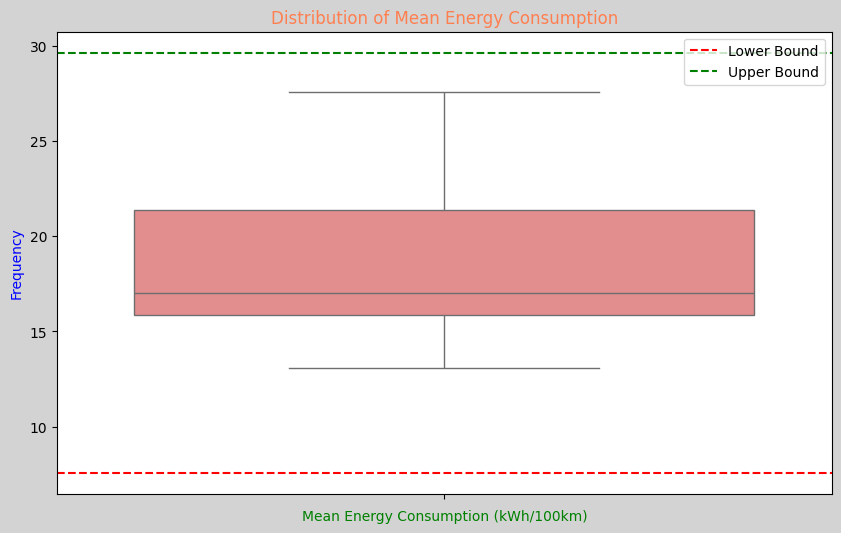

In [214]:
plt.figure(figsize=(10, 6), facecolor= 'lightgrey')
sns.boxplot(data['mean_Energy_Consumption_kWh_100km'], color = 'lightcoral')
plt.axhline(Lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axhline(Upper_bound, color='green', linestyle='--', label='Upper Bound')
plt.xlabel('Mean Energy Consumption (kWh/100km)', color = 'green')
plt.ylabel('Frequency', color= 'blue')
plt.title('Distribution of Mean Energy Consumption', color= 'coral')
plt.legend(loc = 'upper right')
plt.show()



##Outlier Detection:-
####To identify outliers in the column mean_Energy_Consumption_kWh_100km, I applied the IQR method:-

```
1. Quartile_1 (25th perecntile)
2. Quartile_3 (75th percentile)
3. IQR = Q3 - Q1
4. Lower Bound = Q1 - 1.5 * IQR
5. Upper Bound = Q3 + 1.5 * IQR
```


---


####Results: -


```
1. Number of outliers detected:- 0
2. This means all EVs in the dataset have an energy consumption b/w 7.58 and 29.63 kWh/100km, which is within energy consumption patterns.
3. The Boxplot confirms that there are no outliers, as all values fall within the whiskers of the boxplot.
```



##Task 3:- Your manager wants to know if there's a strong relationship between battery capacity and range.

####(A). Create a suitable plot to visualize.

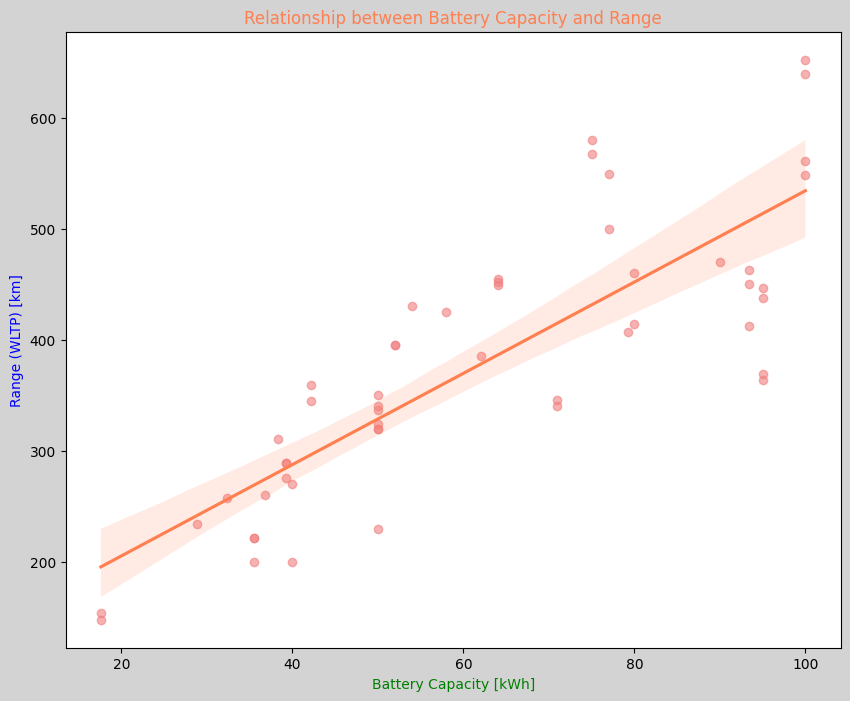

In [215]:
plt.figure(figsize=(10,8), facecolor= 'lightgrey')
sns.regplot(x = 'Battery_kWh', y = 'Range_km', data = data, color = 'lightcoral', scatter_kws= {'alpha': 0.6}, line_kws= {'color': 'coral'})
plt.title('Relationship between Battery Capacity and Range', color = 'coral')
plt.xlabel('Battery Capacity [kWh]', color = 'green')
plt.ylabel('Range (WLTP) [km]', color = 'blue')
plt.show()

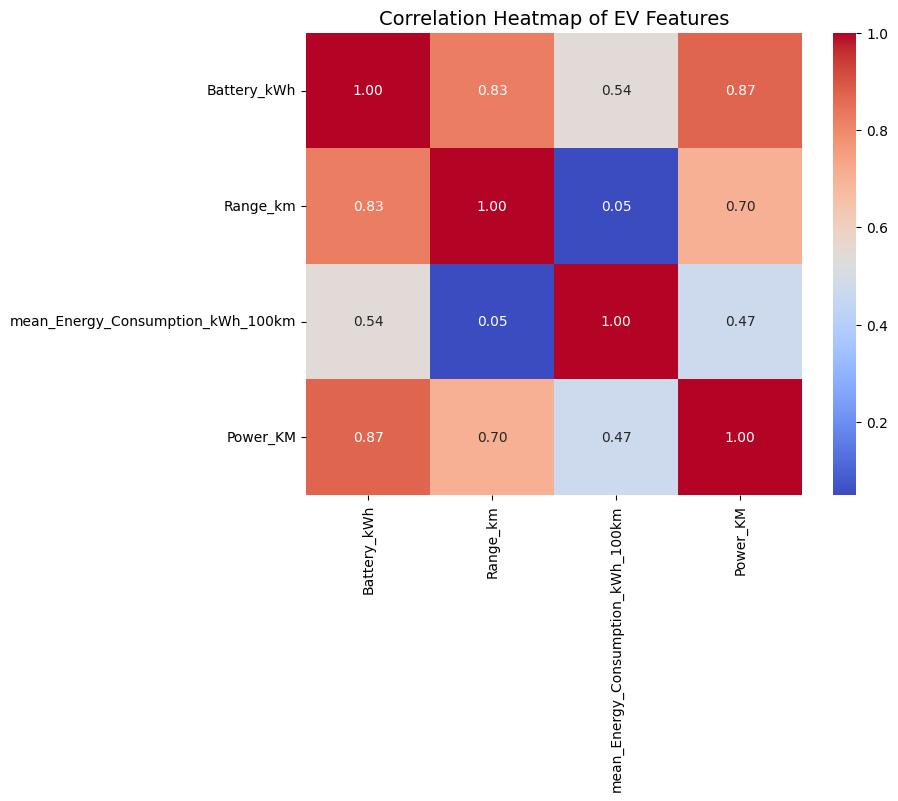

In [216]:
plt.figure(figsize=(8,6))
corr = data[['Battery_kWh','Range_km','mean_Energy_Consumption_kWh_100km','Power_KM']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of EV Features", fontsize=14)
plt.show()


##**Insights**:-


```
1. The scatterplot shows a positive relationship b/w battery capacity and range (EVs with larger batteries generally have longer driving ranges).
2. The correlation coefficeint(heatmap) b/w Battery_kWh and Range_km is typically strong and positive that is 0.83.
3. Range is not determined by battery alone, Factors like energy consumption efficiency, vehicle weight, and power.
```

---



##**Recommendation**: -


```
1. For Customers whoc priortize long driving range, manufacturers with higher battery capacity models should be highlighted.
2. Energy Efficency should also be considered since some EVs achive high range with smaller batteries.
```









##**Task 4:- Build an EV recommendation class.**

####The class should allow users to input their budget, desired range and battery capacity. The class should then return the top three EVs matching their criteria.

In [217]:
class EV_recommendation:
  def __init__(self, data):
    self.data = data

  def recommend(self, budget, range, battery):
    filtered = self.data[(self.data['Price_PLN'] <= budget) &
                         (self.data['Range_km'] >= range) &
                         (self.data['Battery_kWh'] >= battery)].reset_index()
    if filtered.empty:
      return "No EVs match your criteria"

    filtered =  filtered.sort_values(by= ['Range_km', 'Battery_kWh', 'Price_PLN'], ascending=False).head(3)

    plt.figure(figsize=(10,5))
    sns.barplot(x='Range_km', y='Car_Name', data=filtered, color='skyblue', label="Range (km)", edgecolor = 'yellow')
    sns.barplot(x='Battery_kWh', y='Car_Name', data=filtered, color='lightgreen', alpha=0.6, label="Battery (kWh)", edgecolor = 'grey')
    plt.title("Top 3 Recommended EVs")
    plt.xlabel("Value")
    plt.ylabel("Car Name")
    plt.legend()
    plt.show()

    return filtered


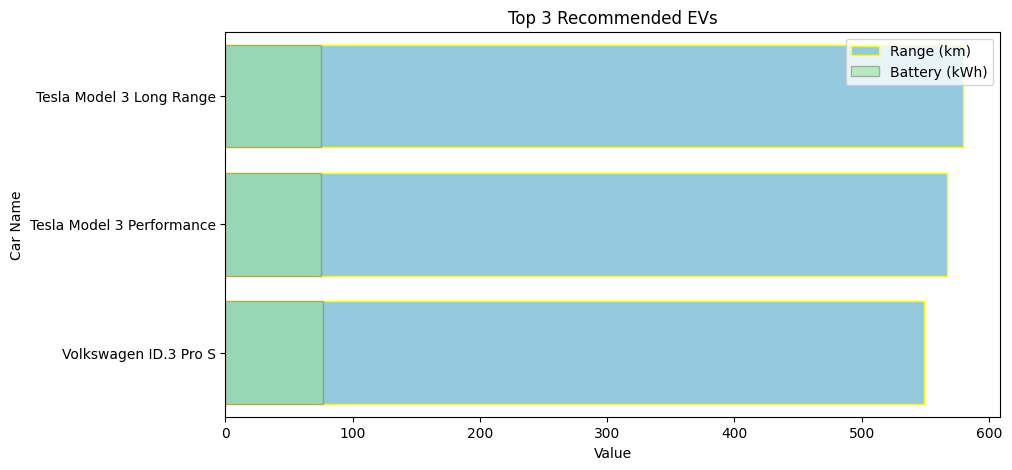

,index,Car_Name,Make,Model,Price_PLN,Power_KM,Max_Torque_Nm,Types_of_Brakes,Drive_Type,Battery_kWh,...,Weight_Gross_kg,Load_Capacity_kg,No_of_Seats,No_of_Doors,Tire_Size_in,Max_Speed_kph,Boot_Capacity_l,Accel_0_100_s,DC_Charge_kW,mean_Energy_Consumption_kWh_100km
7,40,Tesla Model 3 Long Range,Tesla,Model 3 Long Range,235490,372,510,disc (front + rear),4WD,75.0,...,2099.5,485.5,5,5,18,233,425.0,4.4,150,17.0
8,41,Tesla Model 3 Performance,Tesla,Model 3 Performance,260490,480,639,disc (front + rear),4WD,75.0,...,2099.5,485.5,5,5,20,261,425.0,3.3,150,17.0
10,48,Volkswagen ID.3 Pro S,Volkswagen,ID.3 Pro S,179990,204,310,disc (front) + drum (rear),2WD (rear),77.0,...,2280.0,412.0,5,5,19,160,385.0,7.9,125,15.9


In [218]:
recommender = EV_recommendation(data)

recommendations = recommender.recommend(350000, 400, 50)
recommendations

##**Insights:-**


```
1. Tesla dominates the top recommendation with two strong models:-
  (a). Model 3 Long range balance affordablity(235K PLN) with solid battery (75kWh) and excellent range.
  (b). Model 3 Performance offers higher power (480 KM) and accelaration (0-100 km in 3.3s), making it suitable for customers seeking performance.

2. Volkswagen ID.3 Pro S enters the list as a more budget-friendly option (179K PLN) while still providing 77 kWh battery and good efficiency.

3. All three cars satisfy the budget <= 350K PLN and Range >=400km requiremnt with battery sizes around 75-77 kWh.


```


---


##**Recommendatins:-**


```
1. For long-range daily drivers: Tesla Model 3 Long Range is the best fit, offering a balance between price, efficiency, and performance.

2. For performance-focused customers:- Tesla Model 3 Performance is ideal, with high engine power (480 KM) and quick acceleration (3.3s).

3. For cost-conscious customers: Volkswagen ID.3 Pro S is the most affordable among the top 3, still providing a competitive range and strong battery.
```





In [222]:
data.columns

Index(['Car_Name', 'Make', 'Model', 'Price_PLN', 'Power_KM', 'Max_Torque_Nm',
       'Types_of_Brakes', 'Drive_Type', 'Battery_kWh', 'Range_km',
       'Wheelbase_cm', 'Length_cm', 'Width_cm', 'Height_cm', 'Weight_Empty_kg',
       'Weight_Gross_kg', 'Load_Capacity_kg', 'No_of_Seats', 'No_of_Doors',
       'Tire_Size_in', 'Max_Speed_kph', 'Boot_Capacity_l', 'Accel_0_100_s',
       'DC_Charge_kW', 'mean_Energy_Consumption_kWh_100km'],
      dtype='object')

##Task 5:- Inferential Statistics(Hypothesis Testing)

####Test whether there is a significant difference in the average Engine power [KM] of vehicles manufactured by two leading  manufacturers i.e. Tesla and Audi. What insights can you draw from the test results? Recommendations and Conclusion: Provide actionable insights based on your analysis. (Conduct a two sample t-test using ttest_ind from scipy.stats module)

In [235]:
tesla_power = data.loc[data['Make'].str.lower() == 'tesla', 'Power_KM'].dropna()
audi_power = data.loc[data['Make'].str.lower() == 'audi', 'Power_KM'].dropna()
tesla_power.shape , audi_power.shape

((7,), (6,))

In [234]:
t_stat, p_value = stats.ttest_ind(tesla_power, audi_power)
print(f'T-statistic: {t_stat: 3f}')
print(f'P-value: {p_value: 3f}')

alpha = 0.05

if p_value < alpha:
  print("Reject the null hypothesis. There is a significant difference in the average Engine power [KM] of vehicles manufactured by Tesla and Audi.")
else:
  print("Fail to reject the null hypothesis. There is no significant difference in the average Engine power [KM] of vehicles manufactured by Tesla and Audi.")
#

T-statistic:  1.702444
P-value:  0.116727
Fail to reject the null hypothesis. There is no significant difference in the average Engine power [KM] of vehicles manufactured by Tesla and Audi.


####